In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
street_map = gpd.read_file('GBR_adm\GBR_adm0.shp')

<AxesSubplot:>

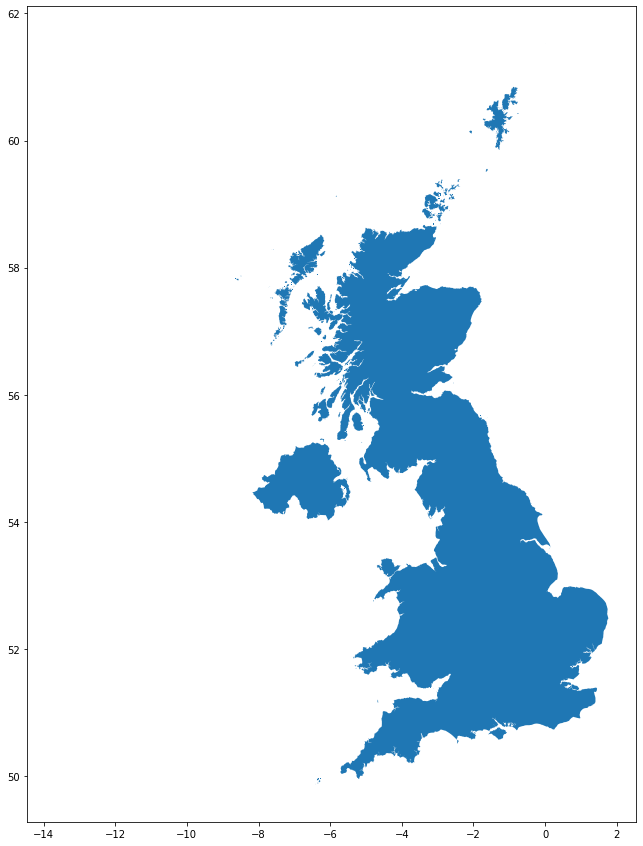

In [3]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [4]:
df = pd.read_csv("dft-road-casualty-statistics-accident-1979-2020.csv")

C:\Users\20202175\.conda\envs\geo-env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0,2,15,16,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
crs = {'init': 'epsg:4326'}
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,197901A11AD14,1979,01A11AD14,NaN,NaN,NaN,NaN,1,3,2,...,-1,1,8,1,-1,0,-1,-1,-1,-1
1,197901A1BAW34,1979,01A1BAW34,198460.0,894000.0,NaN,NaN,1,3,1,...,-1,4,8,3,-1,0,-1,-1,-1,-1
2,197901A1BFD77,1979,01A1BFD77,406380.0,307000.0,NaN,NaN,1,3,2,...,-1,4,8,3,-1,0,-1,-1,-1,-1
3,197901A1BGC20,1979,01A1BGC20,281680.0,440000.0,NaN,NaN,1,3,2,...,-1,4,8,3,-1,0,-1,-1,-1,-1
4,197901A1BGF95,1979,01A1BGF95,153960.0,795000.0,NaN,NaN,1,2,2,...,-1,4,3,3,-1,0,-1,-1,-1,-1


In [6]:
mask = df['accident_year'] == 2020
df = df[mask]

In [7]:
geometry = [Point(xy) for xy in zip( df['longitude'], df['latitude'])]
geometry[:3]

In [8]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

C:\Users\20202175\.conda\envs\geo-env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,geometry
8511625,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,1,9,9,0,0,1,3,2,E01004576,POINT (-0.25400 51.46226)
8511626,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,1,1,0,0,1,1,2,E01003034,POINT (-0.13925 51.47033)
8511627,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,4,1,2,0,0,1,1,2,E01004726,POINT (-0.17872 51.52961)
8511628,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,1,1,0,0,1,1,2,E01003617,POINT (-0.00168 51.54121)
8511629,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,4,1,1,0,0,1,1,2,E01004763,POINT (-0.13759 51.51570)


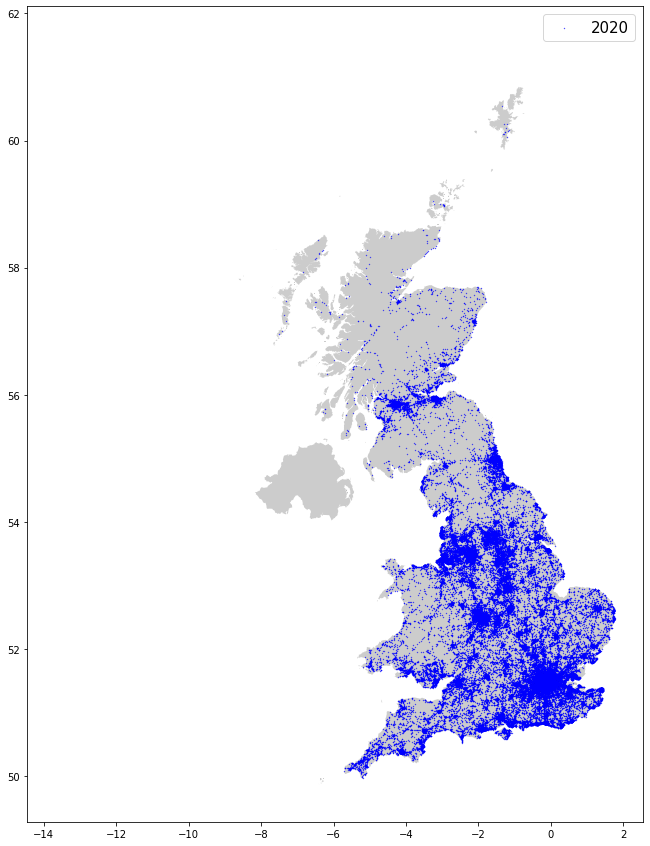

In [9]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['accident_year'] == 2020].plot(ax = ax, markersize = 0.1, color = 'blue', marker = 'o', label = '2020')
plt.legend(prop={'size': 15})

In [10]:
geo_df['junction_detail'].value_counts()

 0     37978
 3     25626
 6      8429
 1      7326
 9      4705
 8      1887
 99     1508
 2      1300
 7      1279
 5      1159
-1         2
Name: junction_detail, dtype: int64

<AxesSubplot:>

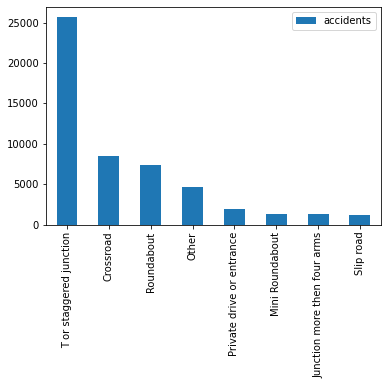

In [13]:
Junction_accidents = pd.DataFrame({'accidents': [25626, 8429, 7326, 4705, 1887, 1300, 1279, 1159]}, index = ['T or staggered junction', 'Crossroad', 'Roundabout', 'Other', 'Private drive or entrance', 'Mini Roundabout', 'Junction more then four arms', 'Slip road' ])
Junction_accidents.plot(kind = 'bar')

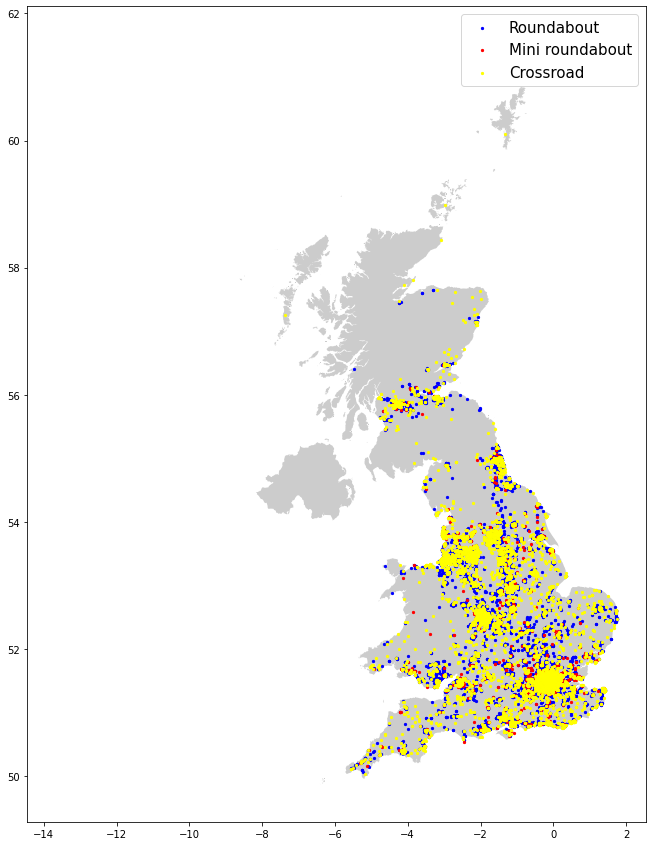

In [11]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['junction_detail'] == 1].plot(ax = ax, markersize = 5, color = 'blue', marker = 'o', label = 'Roundabout')
geo_df[geo_df['junction_detail'] == 2].plot(ax = ax, markersize = 5, color = 'red', marker = 'o', label = 'Mini roundabout')
geo_df[geo_df['junction_detail'] == 6].plot(ax = ax, markersize = 5, color = 'yellow', marker = 'o', label = 'Crossroad')
plt.legend(prop={'size': 15})